In [209]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [210]:

df = pd.read_excel(r'D:/paper/qb/data/lab_data.xlsx')
df.head()

,River,W,S,Q,U,H,D50,D84,R,qs
0,Bogardi1,0.300,0.0104,0.02747,1.06,0.087,0.0068,0.00816,0.0721,24.1
1,Bogardi1,0.300,0.0141,0.01566,0.92,0.057,0.0068,0.00816,0.0504,6.1
2,Bogardi1,0.823,0.0143,0.02288,0.69,0.040,0.0068,0.00816,0.0389,0.2
3,Bogardi1,0.823,0.0145,0.04978,0.82,0.074,0.0068,0.00816,0.0709,21.9
4,Bogardi1,0.823,0.0153,0.03582,0.78,0.056,0.0068,0.00816,0.0535,1.8


In [211]:
X=df.loc[:, [ 'H','S','Q','D50','D84','R']].values
y=df.loc[:, [ 'qs']].values

In [212]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler().fit(X)
X1 = scaler1.transform(X)
scaler2 = MinMaxScaler().fit(y)
y1 = scaler2.transform(y)


In [213]:

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
y_train=y_train.ravel()
y_test=y_test.ravel()


In [214]:
input_dim = X.shape[1]

In [215]:
model = Sequential()
model.add(Dense(units=26 , activation='relu', input_dim=input_dim))
model.add(Dense(units=37  , activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [216]:
from tensorflow.keras.metrics import MeanSquaredError
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


In [217]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=2)

model.fit(X_train, y_train, epochs=50, batch_size=20,verbose=0,callbacks=[early_stopping],use_multiprocessing=True)

In [218]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

9/9 [==============================] - 0s 882us/step - loss: 9.6933e-04 - accuracy: 0.0303
Test loss: 0.0009693254833109677
Test accuracy: 0.03030303120613098


In [219]:
y_pred = model.predict(X_test,verbose=0)

In [220]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('MSE:', mse)

print('RMSE:', rmse)

r_squared = r2_score(y_test, y_pred)

print('R-squared:', r_squared)

mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae)

MSE: 0.0009693256654275286
RMSE: 0.031133995333518127
R-squared: 0.9265040804646915
Mean Absolute Error: 0.008141866447831573


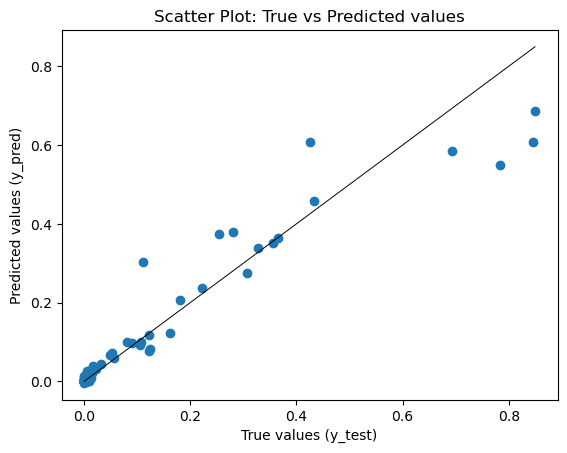

In [221]:
# Scatter plot
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='k', linewidth=0.7)
plt.xlabel('True values (y_test)')
plt.ylabel('Predicted values (y_pred)')
plt.title('Scatter Plot: True vs Predicted values')
plt.show()